# Juliaで固有値問題を精度保証付き数値計算したい


## 固有値問題とは

固有値問題は与えられた行列の固有値および固有ベクトルを求めること。つまり、
$
\newcommand{\C}{\mathbb{C}}
\newcommand{\IC}{\mathbb{IC}}
\newcommand{\bX}{\bar{X}}
$

$$
Ax=\lambda x,\quad A\in \C^{n\times n}
$$

を満たす $\lambda\in \C$, $x\in \C^{n\times n}$ ($x\neq 0$) を求める問題を指す。

Juliaで固有値と固有ベクトルを求める際には、`LinearAlgebra`パッケージに含まれている関数`eigen`・`eigvals`・`eigvecs`で求めることができる。

|関数| 役割 |
|:-----------|:----------|
| eigen()    | 固有値・固有ベクトル両方  |
| eigvals()    | 固有値  |
| eigvecs()  | 固有ベクトル |

これらは行列の構造・サイズをみて適宜、Lapackの関数を呼び出している（はず）。

In [2]:
using LinearAlgebra
val, vec  = eigen([1 2; 2 1])

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 -1.0
  3.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

In [3]:
val#固有値

2-element Array{Float64,1}:
 -1.0
  3.0

In [4]:
vec#固有ベクトル

2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

In [5]:
eigvals([1 2; 2 1])#固有値

2-element Array{Float64,1}:
 -1.0
  3.0

In [6]:
eigvecs([1 2; 2 1])#固有ベクトル

2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

## 密行列の固有値問題に対する精度保証

密行列とは、行列内のほとんどの要素が $0$ でない行列のことを指す。ここでは、行列$A\in\C^{n\times n}$ $(i=1,2,\cdots,n)$ の全ての固有値に対する精度保証アルゴリズムを考える。 

### 実装したいアルゴリズム
(1)
ある行列 $A$ の全ての近似固有ベクトル $\bX\in\C^{n\times n}$ $(i=1,2,\cdots,n)$ を求める。

(2)
$A\cdot\bX$ の包含 $C\in\IC^{n\times n}$ を求める。

(3)
区間連立1次方程式 $\bX G=C$ の解集合の包含 $G\supset \bX^{-1}\cdot C$ ($G\in\IC^{n\times n}$) を求める。

(4)
$G\in\IC^{n\times n}$ に対してゲルシュゴリンの定理を適用することを考える。

#### (1) 行列 $A$ の全ての近似固有ベクトル $\bX\in\C^{n\times n}$ $(i=1,2,\cdots,n)$ を求める。

行列 $A\in\C^{n\times n}$ $(i=1,2,\cdots,n)$ が対角化可能であるとするとき、$\lambda_i$ に対する固有ベクトル$x^{(i)}\in\C^{n}$ $(i=1,2,\cdots,n)$ を並べた行列

$$
X :=[x^{(1)},x^{(2)},\cdots,x^{(n)}]\in\C^{n\times n}
$$

によって、$A$ は

$$
X^{-1}AX = D = \rm{diag}(\lambda_1,\lambda_2,\cdots,\lambda_n)
$$

と対角化される。

In [7]:
using LinearAlgebra

n =100;
A = randn(n,n);

λ, X = eigen(A);

In [8]:
λ #固有値

100-element Array{Complex{Float64},1}:
 -9.492197489989527 - 3.2498810923090025im
 -9.492197489989527 + 3.2498810923090025im
 -8.806991349132643 + 0.0im
  -8.12056613743222 - 0.14093392398559101im
  -8.12056613743222 + 0.14093392398559101im
  -8.00618397245384 - 1.5102958941110636im
  -8.00618397245384 + 1.5102958941110636im
 -7.525946400095856 - 3.5427826001579823im
 -7.525946400095856 + 3.5427826001579823im
 -6.754452118683948 - 1.0344771986250805im
 -6.754452118683948 + 1.0344771986250805im
 -6.565787762538119 - 6.821461985010071im
 -6.565787762538119 + 6.821461985010071im
                    ⋮
 6.5003997878453585 + 0.0im
  6.558059816991777 - 3.831293304101715im
  6.558059816991777 + 3.831293304101715im
   7.26778729989197 - 5.839385930531473im
   7.26778729989197 + 5.839385930531473im
  7.814173143130522 - 2.353958886929639im
  7.814173143130522 + 2.353958886929639im
  8.433519999503174 - 3.3911633583613954im
  8.433519999503174 + 3.3911633583613954im
   8.54733859989548 + 0.0im
 

In [9]:
X #固有ベクトル

100×100 Array{Complex{Float64},2}:
  0.0322191-0.0981953im   …    -0.0721664-0.014555im
  -0.014723+0.0614791im        -0.0344817+0.0547435im
 -0.0163982+0.152679im         -0.0329439-0.121999im
   0.120054+0.0679831im         0.0665547-0.0441893im
 -0.0738404-0.0168217im        -0.0332953+0.141156im
   0.123786+0.0112781im   …     0.0515642+0.0469363im
    0.12868+0.0681164im         0.0579796-0.0534874im
  0.0699785-0.0377809im        -0.0263864-0.0497132im
   0.169985-0.00838917im      -0.00701241-0.0410638im
 -0.0364735-0.0219096im         -0.025234+0.0451737im
 -0.0346161-0.0549485im   …     0.0443346-0.0155532im
 -0.0206306+0.0825745im         0.0696919-0.0423687im
  0.0242683-0.0286843im      -0.000635925+0.0746878im
           ⋮              ⋱  
  0.0175537-0.085998im         -0.0412091+0.00691709im
 -0.0736378+0.0609105im         0.0645685-0.00281318im
  -0.115883-0.00472266im  …     0.0445095-0.0218234im
 -0.0106265+0.17575im            0.100305-0.112805im
  0.0709357-0.09407

しかし、実際のところ上記の数値計算で得られる固有ベクトル $X$ は近似の値 $\bX\in \C^{n\times n}$ (以下、近似固有ベクトルという) である。しかし、近似固有ベクトルを並べた行列を使って、対角化したものについては、対角優位性が期待できる。この行列を $G$ とすると、

$$
G := \bX^{-1}A\bX
$$

となり、行列 $G$ の対角成分は行列 $A$ の固有値の近似となる。

また、対角優位性とは、ある行列$A=(a_{ij})$について、

$$
\left|a_{i i}\right|>\sum_{{j} \colon j \neq i}\left|a_{i j}\right| \quad(i=1,2, \ldots, n)
$$

であること。つまり、行列のどの対角成分の絶対値も、それと同じ列にある非対角成分の和よりも大きい時。

In [10]:
G = inv(X)*A*X; #G
norm(diag(G) - λ,Inf) # Gの対角成分は固有値λにほぼ一致する

2.964199716053824e-13

#### (2) $A\cdot\bX$ の包含 $C\in\IC^{n\times n}$ を求める。

``方法1``各演算を区間演算に変更した方式(参考：[interval_dot-mul.ipynb](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/interval_dot-mul.html "タイトル"))、行列のサイズが小さい場合はこちらの方が早い（たぶん）

In [11]:
using IntervalArithmetic, BenchmarkTools

iA = map(Interval, A);
iX = map(Interval, X);

@btime C1 = $iA * $iX;

  82.459 ms (8 allocations: 312.91 KiB)


In [12]:
@time C1 = iA*iX;
@show max(maximum(radius.(real(C1[:]))),maximum(radius.(imag(C1[:]))))

  0.088229 seconds (76 allocations: 317.188 KiB)
max(maximum(radius.(real(C1[:]))), maximum(radius.(imag(C1[:])))) = 4.107825191113079e-15


4.107825191113079e-15

``方法2``BLASを使う。int_num_linalg.jlの呼び出し。大きな行列に対してはこの方が早い。

In [13]:
include("IntervalLinearAlgebra.jl"); # int_mulを使用する
# @time C1 = mm_comp_interval_alt(iA,iX);
@time C = int_mul(A,X); # A, X: complex matrices (not interval)
@time C = int_mul(A,X); # A, X: complex matrices (not interval)
@time C = int_mul(A,X); # A, X: complex matrices (not interval)


  1.319695 seconds (4.64 M allocations: 222.023 MiB, 4.69% gc time)
  0.150741 seconds (76.04 k allocations: 4.103 MiB)
  0.152356 seconds (76.04 k allocations: 4.103 MiB)


In [14]:
max(maximum(radius.(real(C[:]))),maximum(radius.(imag(C[:]))))

9.08162434143378e-14

In [15]:
real(C)

100×100 Array{Interval{Float64},2}:
 [-0.624953, -0.624952]  [-0.624953, -0.624952]  …  [-0.622965, -0.622964]
  [0.339553, 0.339554]    [0.339553, 0.339554]      [-0.364238, -0.364237]
  [0.651843, 0.651844]    [0.651843, 0.651844]      [-0.159899, -0.159898]
 [-0.918636, -0.918635]  [-0.918636, -0.918635]      [0.636694, 0.636695]
  [0.646239, 0.64624]     [0.646239, 0.64624]       [-0.44699, -0.446989]
 [-1.13836, -1.13835]    [-1.13836, -1.13835]    …   [0.405691, 0.405692]
 [-1.00009, -1.00008]    [-1.00009, -1.00008]        [0.570838, 0.570839]
 [-0.787034, -0.787033]  [-0.787034, -0.787033]     [-0.179872, -0.179871]
 [-1.6408, -1.64079]     [-1.6408, -1.64079]        [-0.0177462, -0.0177461]
  [0.275009, 0.27501]     [0.275009, 0.27501]       [-0.27207, -0.272069]
  [0.150006, 0.150007]    [0.150006, 0.150007]   …   [0.409144, 0.409145]
  [0.464187, 0.464188]    [0.464187, 0.464188]       [0.662493, 0.662494]
 [-0.323581, -0.32358]   [-0.323581, -0.32358]      [-0.0862265, -0.0

In [16]:
imag(C)

100×100 Array{Interval{Float64},2}:
  [0.827381, 0.827382]     …  [-0.20669, -0.206689]
 [-0.535724, -0.535723]        [0.447268, 0.447269]
 [-1.39597, -1.39596]         [-1.11525, -1.11524]
 [-1.03547, -1.03546]         [-0.319253, -0.319252]
  [0.399647, 0.399648]         [1.21329, 1.2133]
 [-0.509345, -0.509344]    …   [0.47103, 0.471031]
 [-1.06477, -1.06476]         [-0.410795, -0.410794]
  [0.131202, 0.131203]        [-0.468436, -0.468435]
 [-0.4728, -0.472799]         [-0.370982, -0.370981]
  [0.326504, 0.326505]         [0.372555, 0.372556]
  [0.63408, 0.634081]      …  [-0.0898026, -0.0898025]
 [-0.716767, -0.716766]       [-0.299756, -0.299755]
  [0.193407, 0.193408]         [0.660299, 0.6603]
   ⋮                       ⋱  
  [0.759262, 0.759263]         [0.0167457, 0.0167458]
 [-0.338861, -0.33886]         [0.0447818, 0.0447819]
  [0.421435, 0.421436]     …  [-0.145106, -0.145105]
 [-1.63373, -1.63372]         [-0.89008, -0.890079]
  [0.662439, 0.66244]          [0.45563, 0.

#### (3 )区間連立1次方程式 $\hat XG=C$ の解集合の包含 $G\supset\hat X^{-1}\cdot C$ を求める。

In [17]:
function verifylss_iB(A,iB) # verify the solution element-wisely
    B = mid.(real(iB)) + mid.(imag(iB))*im;
    X̄ = A\B;
    n = size(X̄,2);
    R = inv(A);
    #########
    #C_mid, C_rad = mm_ufp(R,A);
#     G = Matrix{Float64}(I, n, n) - int_mul(R,A);
    G = Matrix{Float64}(I, n, n) - R*A;
    α = opnorm(G,Inf)# Interval arithmetic
    #########
    if α < 1
        η = (abs.(G)*ones(n))/(1-α);
        Err = map(Interval,zeros(n,n));
        X̄ = map(Interval,X̄);
        r = A*X̄ - iB; # Interval arithmetic
        Rr = R*r;
        for i = 1:n
            Err[:,i] = abs.(Rr[:,i]) + supremum(norm(Rr[:,i],Inf))*η; # Interval arithmetic
        end
        return (real(X̄) .± supremum.(Err)) + im*(imag(X̄) .± supremum.(Err))
    else
        println("Oh my way, verification is failed...")
        return nan;
    end
end

verifylss_iB (generic function with 1 method)

In [18]:
# G = similar(C);
G = verifylss_iB(X,C);
real(G)

100×100 Array{Interval{Float64},2}:
 [-9.4922, -9.49219]          …  [-1.19522e-12, 1.17429e-12]
 [-1.38383e-12, 1.38714e-12]     [-1.19425e-12, 1.17474e-12]
 [-2.23612e-12, 2.22939e-12]     [-1.98973e-12, 1.96535e-12]
 [-2.64053e-12, 2.63424e-12]     [-2.30022e-12, 2.27654e-12]
 [-2.64049e-12, 2.63171e-12]     [-2.27844e-12, 2.29417e-12]
 [-2.65966e-12, 2.66743e-12]  …  [-2.26834e-12, 2.25531e-12]
 [-2.65888e-12, 2.66852e-12]     [-2.26229e-12, 2.26333e-12]
 [-1.75401e-12, 1.75657e-12]     [-1.49406e-12, 1.4812e-12]
 [-1.75195e-12, 1.75855e-12]     [-1.48083e-12, 1.48598e-12]
 [-3.31114e-12, 3.30239e-12]     [-2.8202e-12, 2.81111e-12]
 [-3.29929e-12, 3.31522e-12]  …  [-2.82183e-12, 2.81182e-12]
 [-2.08261e-12, 2.08863e-12]     [-1.75598e-12, 1.76148e-12]
 [-2.08764e-12, 2.08413e-12]     [-1.76449e-12, 1.75205e-12]
   ⋮                          ⋱  
 [-2.83337e-12, 2.83646e-12]     [-2.44493e-12, 2.46512e-12]
 [-3.20994e-12, 3.19549e-12]     [-2.74611e-12, 2.75234e-12]
 [-3.19304e-12, 3

In [19]:
[real(diag(G)), λ]

2-element Array{Array{T,1} where T,1}:
 Interval{Float64}[[-9.4922, -9.49219], [-9.4922, -9.49219], [-8.807, -8.80699], [-8.12057, -8.12056], [-8.12057, -8.12056], [-8.00619, -8.00618], [-8.00619, -8.00618], [-7.52595, -7.52594], [-7.52595, -7.52594], [-6.75446, -6.75445]  …  [6.55805, 6.55806], [7.26778, 7.26779], [7.26778, 7.26779], [7.81417, 7.81418], [7.81417, 7.81418], [8.43351, 8.43352], [8.43351, 8.43352], [8.54733, 8.54734], [8.84997, 8.84998], [8.84997, 8.84998]]
 Complex{Float64}[-9.492197489989527 - 3.2498810923090025im, -9.492197489989527 + 3.2498810923090025im, -8.806991349132643 + 0.0im, -8.12056613743222 - 0.14093392398559101im, -8.12056613743222 + 0.14093392398559101im, -8.00618397245384 - 1.5102958941110636im, -8.00618397245384 + 1.5102958941110636im, -7.525946400095856 - 3.5427826001579823im, -7.525946400095856 + 3.5427826001579823im, -6.754452118683948 - 1.0344771986250805im  …  6.558059816991777 + 3.831293304101715im, 7.26778729989197 - 5.839385930531473im, 7.267787

#### 4) $G\in\IC^{n\times n}$ に対してゲルシュゴリンの定理を適用することを考える。


## ゲルシュゴリンの包含定理
行列 $A=(A_{ij})\in \C^{n\times n}$ について、$A$ の全ての固有値 $\lambda_i$ は、$\bigcup_{1\le i \le n}  U_i$ の内部に存在する。

$$
A\subseteq\bigcup_{1\le i \le n}  U_i 
$$

ただし、

$$
U_i = \left\{z\in\mathbb{C}:|z-a_{ii}|\le \sum_{j\neq i}|a_{ij}|\right\}
$$

である。円盤領域 $U_i$ をゲルシュゴリン円板といい、$A$ が強い優対角性を持つとき、$A$ の対角成分が $A$ の固有値の良い近似となる。今回の場合、$G=(g_{ij})_{1\le i,j\le n}\in\IC^{n\times n}$ の対角成分 $(g_{ii})_{1\le i\le n}$ を $(c_{i})_{1\le i\le n}\in \IC^{n}$ とし、各成分の半径を $\mathrm{rad}(c_i)$ とすると、

$$
\begin{array}{ll}
\mbox{ゲルシュゴリン円の中心:}&\mathrm{mid}(c_i)\\
\mbox{ゲルシュゴリン円の半径:}&r_i=\sum_{j\neq i}\rm{mag}(g_{ij})+\rm{rad}(c_{i})\\
\end{array}
$$

となる。

In [20]:
import IntervalArithmetic: mag, radius, mid
function mag(v::Complex{Interval{T}}) where T# mag function for complex interval vectors
    abs_v = abs(v);
    return max(abs_v.lo,abs_v.hi)
end

function radius(v::Complex{Interval{T}}) where T# mag function for complex interval vectors
    return sqrt(interval(radius(real(v)))^2 + interval(radius(imag(v)))^2)
end

function mid(v::Complex{Interval{T}}) where T# mag function for complex interval vectors
    return mid(real(v)) + mid(imag(v))*im
end

mid (generic function with 7 methods)

In [21]:
r = zeros(n);
c = diag(G);
# G_org = G;
# for i ∈ 1:n
#     G[i,i] = 0;
# end
for i = 1:n
    for j = 1:n
        if i != j
            r[i] += mag(G[i,j]);
        end
    end
    r[i] += mag(radius.(c[i]));
end
λc = mid.(c);

In [22]:
iλ = (real(λc) .± r) + im*(imag(λc) .± r);
[real(iλ) imag(iλ)]

100×2 Array{Interval{Float64},2}:
 [-9.4922, -9.49219]   [-3.24989, -3.24988]
 [-9.4922, -9.49219]    [3.24988, 3.24989]
 [-8.807, -8.80699]    [-2.97313e-10, 2.97313e-10]
 [-8.12057, -8.12056]  [-0.140934, -0.140933]
 [-8.12057, -8.12056]   [0.140933, 0.140934]
 [-8.00619, -8.00618]  [-1.5103, -1.51029]
 [-8.00619, -8.00618]   [1.51029, 1.5103]
 [-7.52595, -7.52594]  [-3.54279, -3.54278]
 [-7.52595, -7.52594]   [3.54278, 3.54279]
 [-6.75446, -6.75445]  [-1.03448, -1.03447]
 [-6.75446, -6.75445]   [1.03447, 1.03448]
 [-6.56579, -6.56578]  [-6.82147, -6.82146]
 [-6.56579, -6.56578]   [6.82146, 6.82147]
   ⋮                   
  [6.50039, 6.5004]    [-3.69718e-10, 3.6969e-10]
  [6.55805, 6.55806]   [-3.8313, -3.83129]
  [6.55805, 6.55806]    [3.83129, 3.8313]
  [7.26778, 7.26779]   [-5.83939, -5.83938]
  [7.26778, 7.26779]    [5.83938, 5.83939]
  [7.81417, 7.81418]   [-2.35396, -2.35395]
  [7.81417, 7.81418]    [2.35395, 2.35396]
  [8.43351, 8.43352]   [-3.39117, -3.39116]
  [8.43351, 8.

In [23]:
sum(λ .∈ iλ)

100

In [24]:
r = sup.(radius.(iλ))

100-element Array{Float64,1}:
 2.515234735669773e-10
 2.5147197453903796e-10
 4.20464400281597e-10
 4.839432200397768e-10
 4.840340891430162e-10
 4.801802775776439e-10
 4.799051973760077e-10
 3.154196422475097e-10
 3.151712536200771e-10
 6.005484327441864e-10
 6.00586271972297e-10
 3.7550080027087776e-10
 3.7546060590393545e-10
 ⋮
 5.228403292255173e-10
 5.78404162725159e-10
 5.786070186708209e-10
 3.439325212971552e-10
 3.440248427331524e-10
 5.512224080622063e-10
 5.512475295415453e-10
 4.3158010663663487e-10
 4.3176349343580893e-10
 3.2446554447229855e-10
 4.1518677127612935e-10
 4.1522005723530343e-10

以上により、全固有値（ $n=100$ ）の精度保証がゲルシュゴリンの包含定理と区間演算によって成功した。

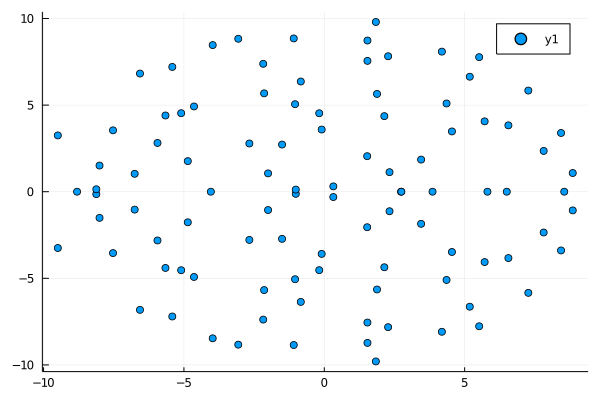

In [25]:
using Plots
# i=1
# zs = [ λ[i] +  r[i]*exp(im*t) for t in 0:pi/100:2pi ]
# plot( real(zs), imag(zs),linewidth=1)
# i = 2
# zs = [ λ[i] +  r[i]*exp(im*t) for t in 0:pi/100:2pi ]
# plot!( real(zs), imag(zs),linewidth=50)
plot(real(λ), imag(λ), seriestype = :scatter)

# end
# xlabel("real part")
# ylabel("imag part")
# axhline(0, lw=0.5, color="k")
# axvline(0, lw=0.5, color="k")
# plt[:axes]()[:set_aspect]("equal")
# plot(index, max_rad, yscale=:log10,
#     xlabel       ="n",                #X軸のラベル
#     ylabel       ="maximum radius",   #Y軸のラベル
#     xlims        =(0,41),             #X軸の範囲
#     title="Error bounds of IG",       #タイトル
#     linewidth    =2,                  #線幅
#     seriestype = :scatter,            #点プロットに　
#     size         =(400,300),          #プロットのサイズ
#     label = "without pre-conditioned",#凡例のラベル
#     legend = false,                   #凡例は今回は消す
# )

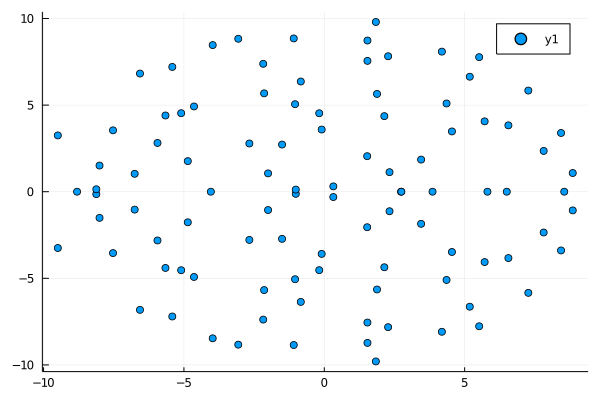

In [31]:
using Plots
plot(mid.(real(iλ)), mid.(imag(iλ)), seriestype = :scatter)

**メモ**　あと、一般化固有値問題を対象に非線形方程式の精度保証方法を利用することで、一部の固有値を精度保証する方法を今後、紹介したい。



本資料は以下のような文献・Web ページ等を参考にこの文章は書いています.

### 参考文献

1. 大石進一編著, 精度保証付き数値計算の基礎, コロナ社, 2018.<br>
精度保証付き数値計算の教科書、3.4.1章にある「密行列に対する精度保証法」を実装した。

1. 齊藤宣一, [計算数理演習](http://infsup.jp/saito/materials/na19exer.pdf), (最終閲覧日 12月9日).<br>
2019年度に行われた、計算数理演習（東京大学理学部数学科，教養学部統合自然科学科）の講義資料．ゲルシュゴリンの包含定理について、MATLABで実装した例が掲載されている.

<div align="right">井藤佳奈子, 高安亮紀, 2020年12月9日</div>